In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [2]:
events = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory = False)

## **Analisis inicial**

In [3]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [4]:
len(events)

2494423

In [5]:
events.isnull().sum()
# trans_id es todo null
# mientras que device_os_version, device_brand, device_city, user_agent, carrier, device_os, wifi y connection_type #
# tienen un numero muy alto de nulls (pueden trabajarse los datos pero no seran totalmente representativos de la muestra) #

date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
device_os_version     1472357
device_brand          1329460
device_model            87967
device_city           1879725
session_user_agent      11786
trans_id              2494341
user_agent            1102896
event_uuid               5099
carrier               1877989
kind                     5099
device_os             1836756
wifi                  1115551
connection_type       1881960
ip_address                  0
device_language         87819
dtype: int64

In [6]:
# Hay que chequear todas las columnas para ver si son valores unicos

## 1 - Cantidad eventos por device_brand

In [7]:
events['cantidad'] = 1
events_graficable = events.groupby('device_brand').agg({'device_brand':'count'})
events_graficable.columns= ['cantidad']

In [8]:
events_graficable = events_graficable.sort_values(by=['cantidad'],ascending=False)
events_graficable = events_graficable.head(10)
events_graficable['Alias'] = ['A','B','C','D','E','F','G','H','I','J']

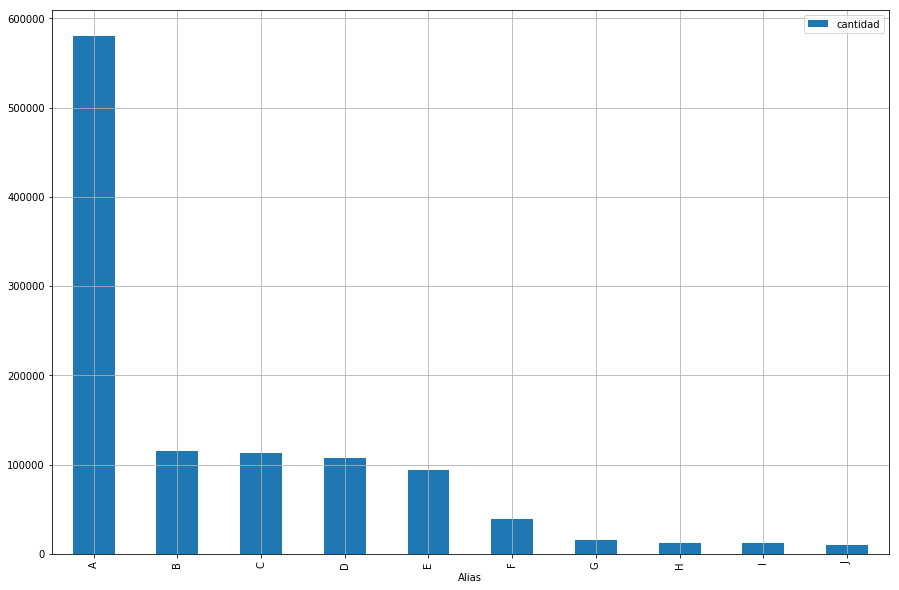

In [9]:
graf = events_graficable.plot.bar(grid = True, x='Alias',figsize = (15,10))

## 2 - Comparacion de cantidad total y atribuida por device brand

In [11]:
events['attributed'].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

In [12]:
events_graficable2 = events.groupby('device_brand').agg({'device_brand':'count', 'attributed':'sum'})
events_graficable2.columns= ['total', 'attributed']

In [14]:
events_graficable2 = events_graficable2.sort_values(by=['total'],ascending=False)
events_graficable2 = events_graficable2.head(10)
events_graficable2['Alias'] = ['A','B','C','D','E','F','G','H','I','J']

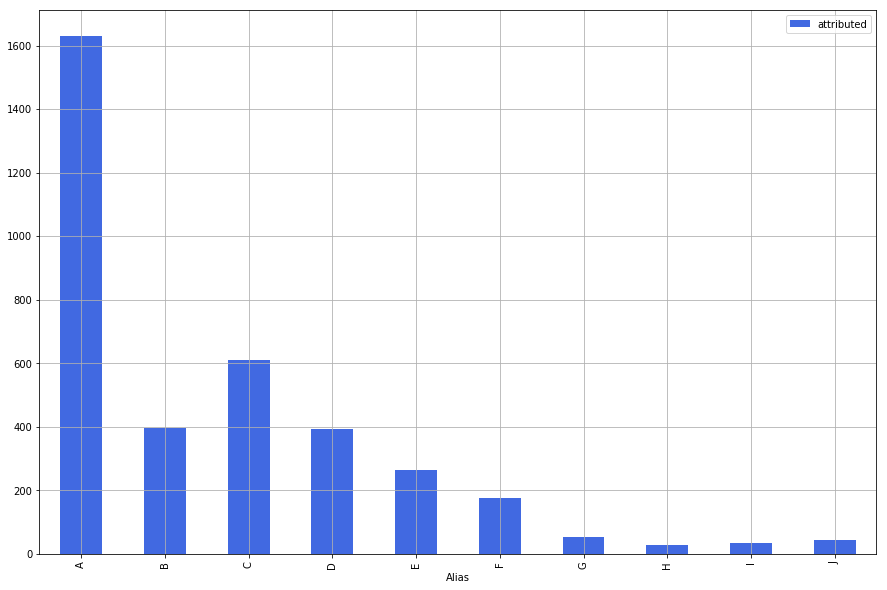

In [21]:
grph2 = events_graficable2.plot.bar(y = 'attributed', x='Alias',figsize = (15,10), grid = True, color = 'royalblue')

### Se puede apreciar una cierta tendencia que a mayor numero de events -> mayor numero de attributed sin importar la marca
Caso especial en C (eventos mas propensos a ser atribuidos a jampp a menor cantidad)

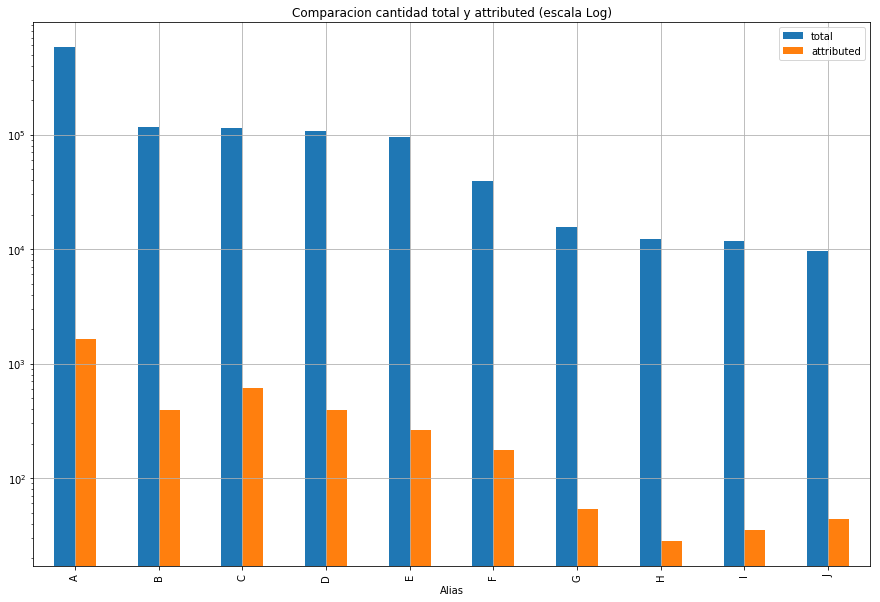

In [23]:
grph3 = events_graficable2.plot.bar( x='Alias',figsize = (15,10), grid = True, title = 'Comparacion cantidad total y attributed (escala Log)')
grph3.set_yscale('log')